In [12]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [34]:
import cv2

In [35]:
import matplotlib.pyplot as plt

In [36]:
config_file= 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [37]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [38]:
classLabels=[]
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [39]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [40]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 000001B891916750>

In [41]:
img = cv2.imread('image.jpg')

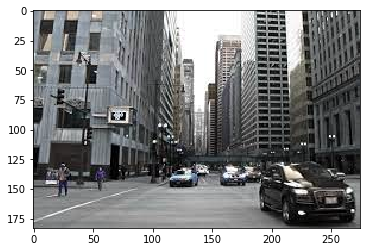

In [42]:
plt.imshow(img)

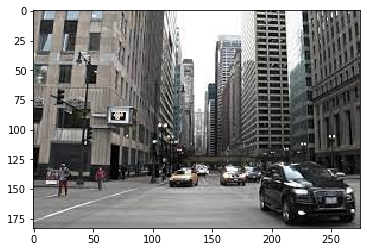

In [43]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [45]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [46]:
print(ClassIndex)

[[3]
 [3]]


In [47]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),  confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)

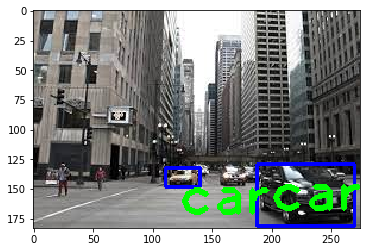

In [48]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [50]:
cap = cv2.VideoCapture("video.mp4")

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video")

font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.5)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)
    cv2.imshow('Object Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows
          

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [9]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
()
[[ 1]
 [62]]
[[62]
 [62]
 [ 1]]
[[62]]
[[62]
 [ 1]
 [62]]
[[62]
 [ 1]
 [ 1]
 [ 9]]
[[ 1]
 [62]
 [ 9]]
[[ 1]
 [62]
 [62]]
[[ 1]
 [62]
 [62]
 [62]]
[[ 1]
 [ 1]
 [62]
 [ 1]]
[[ 1]
 [62]
 [62]
 [62]]
[[ 1]
 [62]
 [62]
 [ 1]
 [62]
 [ 1]]
[[ 1]
 [ 1]
 [62]
 [62]
 [ 9]
 [62]]
[[ 1]
 [ 1]
 [62]
 [62]]
[[ 1]
 [62]
 [ 1]]
[[ 1]
 [ 1]
 [62]
 [62]]
[[62]
 [62]]
[[62]
 [62]]
[[62]
 [62]
 [62]
 [62]]
[[62]
 [ 1]
 [ 1]
 [62]
 [62]]
[[ 1]
 [ 1]
 [62]]
[[

[[1]
 [3]
 [1]
 [2]
 [2]
 [2]]
[[1]
 [3]
 [1]
 [2]]
[[1]
 [1]
 [3]
 [2]
 [2]]
[[1]
 [2]
 [2]
 [2]
 [2]
 [3]]
[[1]
 [2]
 [2]
 [2]
 [2]
 [3]
 [2]
 [1]]
[[1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]]
[[1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[1]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]]
[[1]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]]
[[1]
 [2]
 [2]
 [1]
 [2]
 [2]]
[[1]
 [2]
 [2]
 [2]]


error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-t9hleyt8\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
